In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#################    Read data from CSV file   #################
df = pd.read_csv('cardiovascular.csv')
df

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [2]:
######dataset cleaning
# drop the "ind" it's not adding any value to the dataset
df=df.drop("ind",1)

# conver float values into integer
float_col = df.select_dtypes(include=['float64']) 
list(float_col.columns.values)
for col in float_col.columns.values:
   df[col] = df[col].astype('int64')
#Convert categorical features to numerical using label encoding
df['famhist'] =df['famhist'].astype('category').cat.codes

The Significant Value of the Features
Feature: 0, Score: 51.948
Feature: 1, Score: 86.342
Feature: 2, Score: 42.997
Feature: 3, Score: 28.365
Feature: 4, Score: 57.872
Feature: 5, Score: 33.206
Feature: 6, Score: 93.462
Feature: 7, Score: 83.439
Feature: 8, Score: 50.617


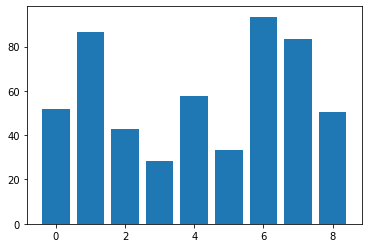

In [3]:
#Calculate The Significant Value of the Features
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

X, y = make_regression(n_samples=462, n_features=9, n_informative=9, random_state=1)
model = LinearRegression()
model.fit(X, y) # fit the model

importance = model.coef_   # get importance
#summarize feature importance
#Features=[sbp',	'tobacco',	'ldl'	, 'adiposity'	,'famhist',	'typea',	'obesity',	'alcohol',	'age']
print("The Significant Value of the Features")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))

# plot feature importance
plt.show()
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [4]:
#remove the features with low significant value score, here we have 'adiposity'=28.365 and 'typea'=33.206
df=df.drop(['adiposity','typea'],axis=1)
df

,sbp,tobacco,ldl,famhist,obesity,alcohol,age,chd
0,160,12,5,1,25,97,52,1
1,144,0,4,0,28,2,63,1
2,118,0,3,1,29,3,46,0
3,170,7,6,1,31,24,58,1
4,134,13,3,1,25,57,49,1
...,...,...,...,...,...,...,...,...
457,214,0,5,0,28,0,58,0
458,182,4,4,0,28,18,52,1
459,108,3,1,0,20,26,55,0
460,118,5,11,0,27,23,40,0


In [5]:
##########   Normalize the independent variables    ############
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df= preprocessing.MinMaxScaler().fit_transform(df)
df=pd.DataFrame(df, columns=['sbp',	'tobacco',	'ldl'	,'famhist',	'obesity',	'alcohol',	'age','chd'])   
df

,sbp,tobacco,ldl,famhist,obesity,alcohol,age,chd
0,0.504274,0.387097,0.333333,1.0,0.34375,0.659864,0.755102,1.0
1,0.367521,0.000000,0.266667,0.0,0.43750,0.013605,0.979592,1.0
2,0.145299,0.000000,0.200000,1.0,0.46875,0.020408,0.632653,0.0
3,0.589744,0.225806,0.400000,1.0,0.53125,0.163265,0.877551,1.0
4,0.282051,0.419355,0.200000,1.0,0.34375,0.387755,0.693878,1.0
...,...,...,...,...,...,...,...,...
457,0.965812,0.000000,0.333333,0.0,0.43750,0.000000,0.877551,0.0
458,0.692308,0.129032,0.266667,0.0,0.43750,0.122449,0.755102,1.0
459,0.059829,0.096774,0.066667,0.0,0.18750,0.176871,0.816327,0.0
460,0.145299,0.161290,0.733333,0.0,0.40625,0.156463,0.510204,0.0


In [ ]:
#df.to_csv('cardiovascular_clean.csv')

In [6]:
X = df.drop(['chd'], axis=1)
y = df['chd']       

In [7]:
#Split the data to training 70% and testing 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [8]:
############################## The Neural Network Model ##########################################
model = keras.Sequential([ keras.layers.Dense(50, activation=tf.nn.relu, input_shape=(7,)), keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.compile(
    optimizer='adam',
    loss='mse',
    #metrics=[tf.keras.metrics.MeanAbsoluteError()])
    #metrics=[tf.keras.metrics.CosineSimilarity(axis=1)])
    metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=10, epochs=50)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.4f' % test_acc, '\n')

Epoch 1/50
33/33 [==============================] - 0s 980us/step - loss: 0.2407 - accuracy: 0.6409
Epoch 2/50
33/33 [==============================] - 0s 943us/step - loss: 0.2249 - accuracy: 0.6842
Epoch 3/50
33/33 [==============================] - 0s 924us/step - loss: 0.2173 - accuracy: 0.6842
Epoch 4/50
33/33 [==============================] - 0s 931us/step - loss: 0.2122 - accuracy: 0.6842
Epoch 5/50
33/33 [==============================] - 0s 881us/step - loss: 0.2081 - accuracy: 0.6842
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.6873
Epoch 7/50
33/33 [==============================] - 0s 847us/step - loss: 0.2006 - accuracy: 0.6873
Epoch 8/50
33/33 [==============================] - 0s 895us/step - loss: 0.1966 - accuracy: 0.6904
Epoch 9/50
33/33 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.7090
Epoch 10/50
33/33 [==============================] - 0s 921us/step - loss: 0.1912 - accuracy: 0.6997
Epo

# **Evaluation Metrics**

In [26]:
# Recall, F1-Score, Precision
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
givenDec = lambda gdVal: float('%.3f' % gdVal)
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=2000, random_state=42)

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

model = mlp.fit(X_train, y_train)
test_predictions = model.predict(X_test)
evaluate_results(y_test, test_predictions)



              precision    recall  f1-score   support

         0.0     0.7228    0.9012    0.8022        81
         1.0     0.7895    0.5172    0.6250        58

    accuracy                         0.7410       139
   macro avg     0.7561    0.7092    0.7136       139
weighted avg     0.7506    0.7410    0.7283       139



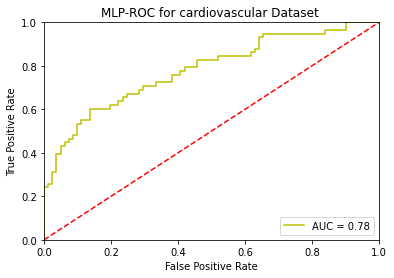

In [27]:
##### ROC ######################
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from inspect import signature


mlp.fit(X_train, y_train)
probs = mlp.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('MLP-ROC for cardiovascular Dataset ')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()